In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [3]:
df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
#initial exploration
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape

(48895, 16)

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [8]:
#fill missing values w 'unknown'
df['name'].fillna('Unknown', inplace=True)
df['host_name'].fillna('Unknown', inplace=True)

<ipython-input-8-134f7cf7b90f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('Unknown', inplace=True)
<ipython-input-8-134f7cf7b90f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [9]:
#fill missing values w '0'
df['reviews_per_month'].fillna(0, inplace=True)

<ipython-input-9-f234e3c2cd11>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [10]:
#convert
df['last_review'] = df['last_review'].fillna(pd.to_datetime('1900-01-01'))

In [11]:
df['last_review'].dtype

dtype('O')

In [12]:
#checking
df['last_review'].isnull().sum()

np.int64(0)

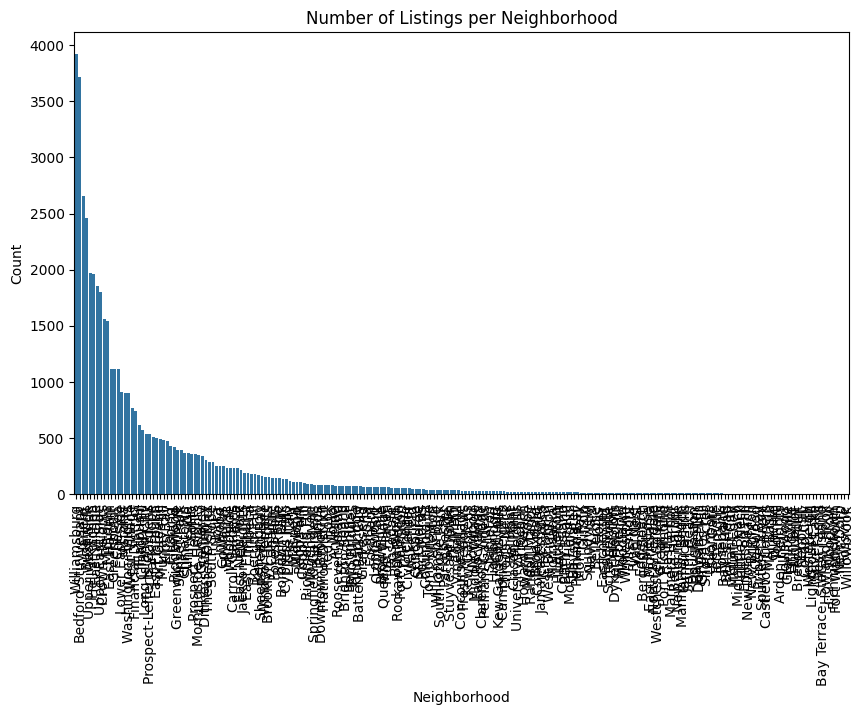

In [13]:
#listings per neighborhood
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='neighbourhood', order=df['neighbourhood'].value_counts().index)
plt.xticks(rotation=90)  #labels
plt.title('Number of Listings per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.show()

<ipython-input-14-58dbb7475bf6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_neigh.values, y=top_10_neigh.index, palette='crest')


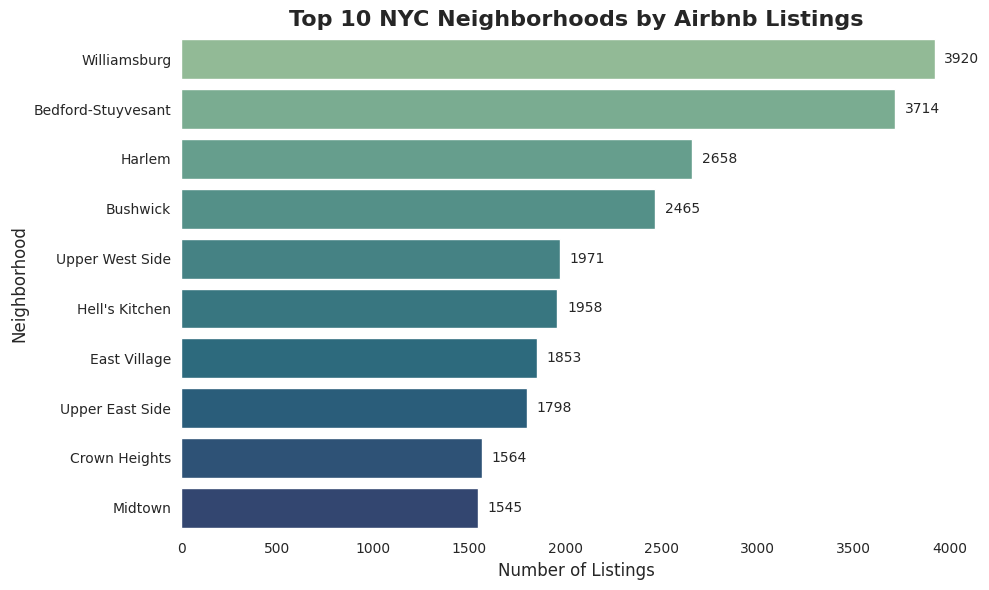

In [14]:
#top 10 neighborhoods by listing count
top_10_neigh = df['neighbourhood'].value_counts().head(10)

#x grid lines
sns.set_style("white")

#plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_neigh.values, y=top_10_neigh.index, palette='crest')

#title and axis labels
plt.title('Top 10 NYC Neighborhoods by Airbnb Listings', fontsize=16, weight='bold')
plt.xlabel('Number of Listings', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

#number labels on bars
for index, value in enumerate(top_10_neigh.values):
    plt.text(value + 50, index, str(value), va='center', fontsize=10)

#x top and right borders
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

<ipython-input-15-44381b34e04c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_counts.index, y=borough_counts.values, palette='Set2')


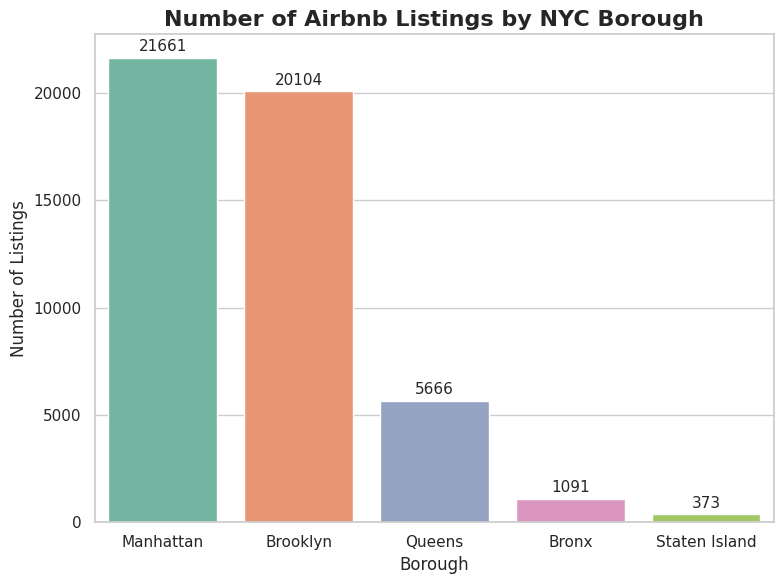

In [15]:
#setting style
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))

#listings by borough
borough_counts = df['neighbourhood_group'].value_counts()

#plot
sns.barplot(x=borough_counts.index, y=borough_counts.values, palette='Set2')

#title and labels
plt.title('Number of Airbnb Listings by NYC Borough', fontsize=16, weight='bold')
plt.xlabel('Borough', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)

#number labels on bars
for index, value in enumerate(borough_counts.values):
    plt.text(index, value + 300, str(value), ha='center', fontsize=11)

plt.tight_layout()
plt.show()

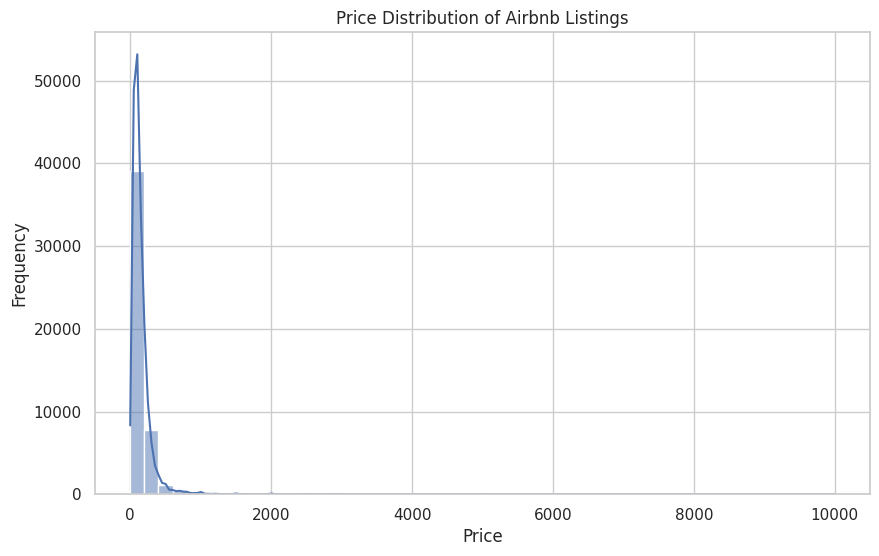

In [16]:
#price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<ipython-input-17-b668d2667a0b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top10_df, y='neighbourhood', x='price', palette='crest')


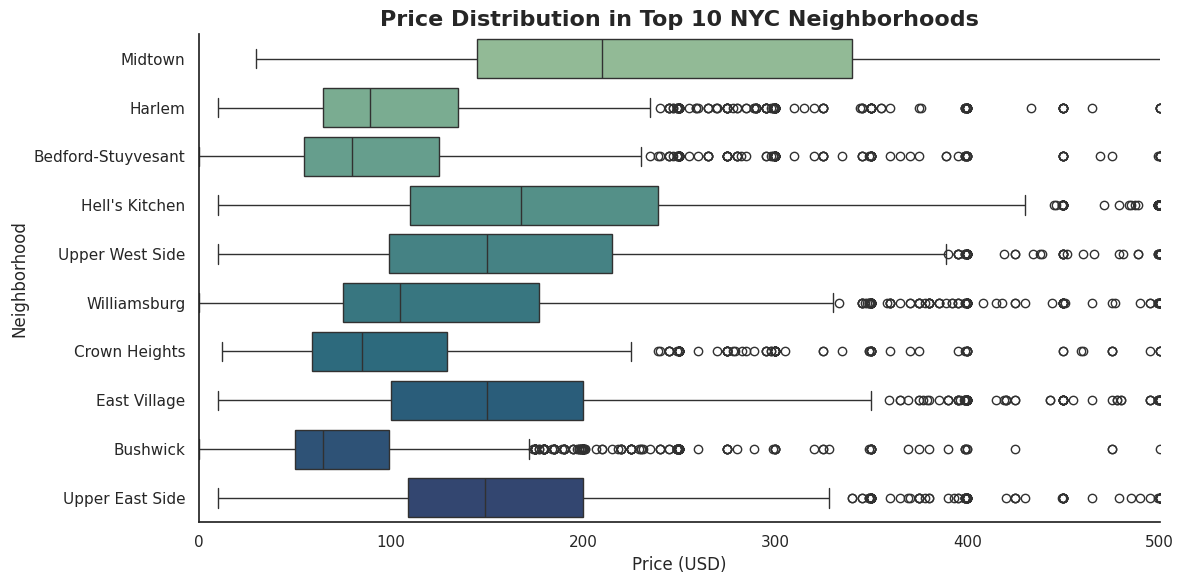

In [17]:
#the top 10 neighborhoods
top_10_neigh = df['neighbourhood'].value_counts().head(10).index

#filter the DataFrame
top10_df = df[df['neighbourhood'].isin(top_10_neigh)]

#plot
plt.figure(figsize=(12, 6))
sns.set_style("white")

#boxplot
sns.boxplot(data=top10_df, y='neighbourhood', x='price', palette='crest')

#title and axis labels
plt.title('Price Distribution in Top 10 NYC Neighborhoods', fontsize=16, weight='bold')
plt.xlabel('Price (USD)', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

#limit x-axis to reduce effect of outliers
plt.xlim(0, 500)

sns.despine()
plt.tight_layout()
plt.show()